In [ ]:
import numpy as np
import sympy as sp
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from numpy.linalg import solve

Calcular el spline cúbico que interpola los puntos  (−1,5) ,  (0,3) ,  (1,3) ,  (2,4) , encontrando los polinomios  S0(x) ,  S1(x)  y  S2(x) . Evalue su respuesta para  x=1.5  usando CubicSpline de scipy.

 Tenemos los puntos $(x_{0}, y_{0}) = (-1,5)$  ,  $(x_{1}, y_{1}) = (0,3)$ , $(x_{2}, y_{2}) = (1,3)$ y $(x_{3}, y_{3}) = (2,4)$.

Comencemos por definir las ecuaciones cúbicas y las condiciones del Spline para cada polinomio $S_{i}$, siguiendo la forma

$S_{i}(x) = a_{i} + b_{i}(x - x_{i}) + c_{i}(x - x_{i})^{2} + d_{i}(x - x_{i}) ^ {3}$

$S_{i}$ debe pasar por los puntos $(x_{i}, y_{i})$ y $(x_{i +1}, y_{i +1})$

 1. En $x_{0} = -1$, $S_{0}(x_{0}) = y_{0} = 5$ por lo que:    
   $$
   a_{0} = 2
   $$

2. En $x_{1} = 0, S_{0}(x_{1}) = y_{1} = 3$.   
 Además, $h_{0} = 1$ (Notemos que todos los $h_{i} = 1$ en este ejercicio). Por lo que nos queda la ecuación:
\begin{equation}
 5 + b_{0} + c_{0} + d_{0} = 3 \end{equation} que simplificando nos da:
 $$
 b_{0} + c_{0} + d_{0} = -2 \quad (1)
 $$
3. En $x_{1} = 0, S_{1}(x_{1}) = y_{1} = 3$ por lo que:    
   $$
   a_{1} = 3
   $$
4. En $x_{2} = 1, S_{1}(x_{2}) = y_{2} = 3$. Quedando:
\begin{equation}
3 + b_{1} + c_{1} + d_{1} = 3 \end{equation} ó
\begin{equation}
b_{1} + c_{1} + d_{1} = 0 \quad (2) \end{equation}

5. En $x_{2} = 1, S_{2}(x_{2}) = y_{2} = 3$. Dándonos $$
   a_{2} = 3
   $$

6. En $x_{3} = 2, S_{2}(x_{3}) = y_{3} = 4$. Así:
\begin{equation}
3 + b_{2} + c_{2} + d_{2} = 4 \end{equation} quedando

\begin{equation}
 b_{2} + c_{2} + d_{2} = 1 \quad (3) \end{equation}.

 Ya teniendo $S_{0}, S_{1}, S_{2}$ Podemos proceder con el estudio de la continuidad de las derivadas de estos polinomios.

 Tenemos que la primera y segunda derivada de $S_{0}$ y $S_{1}$ debe coincidir en $x_{1}$, al igual que con $S_1$ y $S_2$ en $x_2$ es decir: $S_{0}^{'}(x_{1} = 0) = S_{1}^{'}(x_{1} = 0)$ y  $S_{1}^{'}(x_{2} = 1) = S_{2}^{'}(x_{2} = 1)$, derivando $S_{i}$ nos queda:
 \begin{equation}
 S_i'(x) = b_i + 2c_i h + 3d_i h^2 \end{equation}
 $$
   S_i''(x_{i+1}) = S_{i+1}''(x_{i+1}) \quad \text{para} \quad i = 0, 1, \dots, n-1
   $$
 Y aplicando lo anterior queda:

 \begin{equation}
 b_0 + 2c_0h_0 + 3d_0h_0^2 = b_1 \end{equation}

 recordando que $h_i = 1$ podemos simplificar:

 \begin{equation}
 b_0 + 2c_0 + 3d_0 = b_1 \quad (4) \end{equation}

  aplicando el mismo proceso para $S_1$ y $S_2$ nos queda:

 \begin{equation}
 b_1 + 2c_1 + 3d_1 = b_2 \quad (5)\end{equation}

 Ahora, para la segunda derivada:

 $$
   c_0 + 3d_0 = c_1 \quad (6)
   $$
   y
   $$
   c_1 + 3d_1 = c_2 \quad (7)
 $$

Ahora procedemos con la condición de frontera, donde, para un spline natural, las segundas derivadas en los extremos deben ser 0

1. Para $x_0 = -1$, $S^{''}(x_0) = 0$, dando
$2c_0 = 0 \rightarrow c_0 = 0$

2. Para $x_3 = 2$  $S^{''}(x_3) = 0$, dando
$2c_2 + 6d_2 = 0 \rightarrow c_2 + 2d_2 = 0  \rightarrow c_2 = - 3d_2 \quad(8) $

Por último crearemos el sistema de ecuaciones con nuestras incógnitas $(b_0, b_1, b_2, c_1, c_2, d_0, d_1, d_2)$. Nuestras variables conocidas son $c_0 = 0, a_0 = 5, a_1 = 3, a_2 = 3$. Utilizando estos resultados, simplificaremos las ecuaciones que podamos.

De (1):
$$
b_0 + d_0 = -2
$$
De (4):
$$
b_0 + 3d_0 = b_1
$$
De (6)
$$
3d_0 = c_1
$$
Ahora crearemos una matriz para resolver el sistema.

$$
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 1 & 0 & 1 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 1 & 0 & 0 & 1\\
1 & -1 & 0 & 0 & 0 & 3 & 0 & 0\\
0 & 1 & -1 & 2 & 0 & 0 & 3 & 0\\
0 & 0 & 0 & -1 & 0 & 3 & 0 & 0\\
0 & 0 & 0 & 1 & -1 & 0 & 3 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 3\\
\end{pmatrix}
\begin{pmatrix}
b_0 \\
b_1 \\
b_2 \\
c_1 \\
c_2 \\
d_0 \\
d_1 \\
d_2 \\
\end{pmatrix}
=
\begin{pmatrix}
-2 \\
0 \\
1 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{pmatrix}
$$

Finalmente usaremos python para resolver dicho sistema

In [ ]:
x_val = np.array([-1, 0, 1, 2])
y_val = np.array([5, 3, 3, 4])

In [ ]:
A = np.array([
[1, 0, 0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0, 1, 0],
[0, 0, 1, 0, 1, 0, 0, 1],
[1, -1, 0, 0, 0, 3, 0, 0],
[0, 1, -1, 2, 0, 0, 3, 0],
[0, 0, 0, -1, 0, 3, 0, 0],
[0, 0, 0, 1, -1, 0, 3, 0],
[0, 0, 0, 0, 1, 0, 0, 3]])

B = np.array([-2, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
sol = solve(A,B)

b0, b1, b2, c1, c2, d0, d1, d2 = sol
sol

array([-2.46666667, -1.06666667,  0.73333333,  1.4       ,  0.4       ,
        0.46666667, -0.33333333, -0.13333333])

In [ ]:
a0 = 5
a1 = 3
a2 = 3
c0 = 0

In [ ]:
x = sp.symbols('x')
x0, x1, x2, x3 = -1, 0, 1, 2
S0 = a0 + b0*(x-x0) + c0*(x-x0)**2 + d0*(x-x0)**3
sp.expand(S0)

0.466666666666667*x**3 + 1.4*x**2 - 1.06666666666667*x + 3.0

In [ ]:
S1 = a1 + b1*(x-x1) + c1*(x-x1)**2 + d1*(x-x1)**3
sp.expand(S1)

-0.333333333333333*x**3 + 1.4*x**2 - 1.06666666666667*x + 3

In [ ]:
S2 = a2 + b2*(x-x2) + c2*(x-x2)**2 + d2*(x-x2)**3
sp.expand(S2)

-0.133333333333333*x**3 + 0.8*x**2 - 0.466666666666666*x + 2.8

In [ ]:
S0_ = sp.lambdify(x, S0)
S1_ = sp.lambdify(x, S1)
S2_ = sp.lambdify(x, S2)

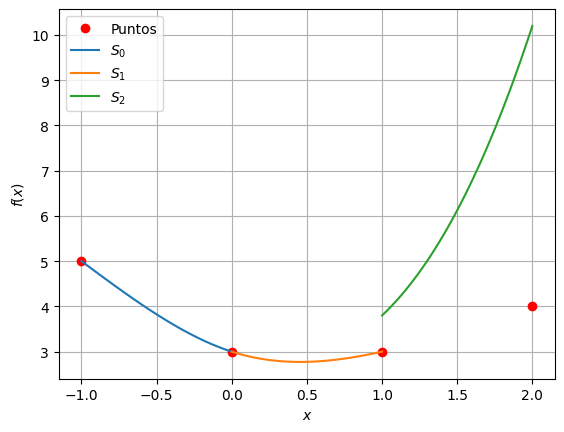

In [ ]:
x_0 = np.linspace(x_val[0], x_val[1], 100)
x_1 = np.linspace(x_val[1], x_val[2], 100)
x_2 = np.linspace(x_val[2], x_val[3], 100)

plt.plot(x_val, y_val, 'ro', label = 'Puntos')
plt.plot(x_0, S0_(x_0), label='$S_0$')
plt.plot(x_1, S1_(x_1), label='$S_1$')
plt.plot(x_2, S0_(x_2), label = '$S_2$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()
plt.show()

In [ ]:
CubicSpline = CubicSpline(x_val, y_val, bc_type='natural')

In [ ]:
print(f'Spline cúbico calculado para x = 1.5: {S2_(1.5)} ,\nRespuesta usando CubicSpline de Scipy : {CubicSpline(1.5)}')

Spline cúbico calculado para x = 1.5: 3.450000000000003 ,
Respuesta usando CubicSpline de Scipy : 3.45


# A pesar de que la gráfica no represente un polinomio que pasa por todos los puntos, el resultado evaluado en $x$ = 1.5 usando CubicSpline y el obtenido en el proceso es el mismo.